# 1.Load the data file using pandas. 

In [1]:
#import pandas library
import pandas as pd

In [2]:
#load the data file usibg pandas
google_data = pd.read_csv(r'C:\Users\PurvaRaut\Desktop\Data Analytics\6.Python\Python Project\googleplaystore.csv')

In [3]:
#checking dat file columns and other information
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
#checking how does the dataframe look like
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2.Check for null values in the data. Get the number of null values for each column.

In [5]:
#check null values in the dataframe using 'isnull' and 'any'
google_data.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [6]:
#check exact nulls in the dataframe using 'isnull' and summing it up, axis 0 is for rows
google_data.isnull().sum(axis = 0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 3.Drop records with nulls in any of the columns. 

In [7]:
# dropping rows with null values just putting the names of the columns which have null values
google_data.dropna(axis=0, subset=['Rating','Type','Content Rating','Current Ver','Android Ver'],inplace=True)

In [8]:
#check if the dataframe is cleared of null values
google_data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [9]:
#Recheck if the dataframe is cleared of null values 
google_data.isnull().sum(axis = 0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# 4.Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
## 4.1.Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
### 4.1.1.Extract the numeric value from the column
### 4.1.2.Multiply the value by 1,000, if size is mentioned in Mb

In [10]:
#describing the data frame for 'Size' column
google_data['Size'].describe()

count                   9360
unique                   413
top       Varies with device
freq                    1637
Name: Size, dtype: object

In [11]:
# In column 'Size' replace 'varies with device' with a blank
google_data['Size'] = google_data['Size'].apply(lambda x :str(x).replace('Varies with device','')if 'Varies with device' in str(x) else x)

In [12]:
# In column 'Size' replace 'k' with a blank
google_data['Size'] = google_data['Size'].apply(lambda x :str(x).replace('k','')if 'k' in str(x) else x)

In [13]:
# In column 'Size' replace ',' with a blank
google_data['Size'] = google_data['Size'].apply(lambda x :str(x).replace(',','')if ',' in str(x) else x)

In [14]:
# In column 'Size' replace 'M' with a blank and also multiply it with 1000 to convert it to Kb values
google_data['Size'] = google_data['Size'].apply(lambda x : float(str(x).replace('M','')) * 1000 if 'M' in str(x) else x)

In [15]:
#checking the dataframe
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600.0,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [16]:
# Converting the column 'Size' from object to numeric(int64 or float64)
google_data['Size'] = pd.to_numeric(google_data['Size'])

In [17]:
#check if the 'Size' column is converted into numeric#
#float64 in Dtype column confirms that the data-type of 'Size' has converted into numeric
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


In [18]:
#checking the dataframe for null values after working on the'Size' column
#True states that we have null values
google_data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size               True
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [19]:
#drop the rows on dataframe which have null values
google_data.dropna(axis=0, subset=['Size'], inplace= True)

In [20]:
#recheck the dataframe for null values
#'False' states that there are no null values
google_data.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

# 4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [21]:
#Convert the column'Reviews' into numeric data type
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'])

In [22]:
#check if the column'Reviews' is converted to the numeric data type
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int64  
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   object 
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 844.7+ KB


# 4.3 Installs field is currently stored as string and has values like 1,000,000+. 
## 4.3.1Treat 1,000,000+ as 1,000,000 
### 4.3.2 remove ‘+’, ‘,’ from the field, convert it to integer

In [23]:
#Replace '+' with blank in for values in the 'Installs' column
google_data['Installs'] = google_data['Installs'].apply(lambda x :str(x).replace('+','')if '+' in str(x) else x)

In [24]:
#Replace ',' with blank in for values in the 'Installs' column
google_data['Installs'] = google_data['Installs'].apply(lambda x :str(x).replace(',','')if ',' in str(x) else x)

In [25]:
#Convert 'Installs' column from object to into numeric data type
google_data['Installs'] = pd.to_numeric(google_data['Installs'])

# 4.4 Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [26]:
#Replace '$' with blank in for values in the 'Price' column
google_data['Price'] = google_data['Price'].apply(lambda x :str(x).replace('$','')if '$' in str(x) else x)

In [27]:
#Convert 'Price' column from object to into numeric data type
google_data['Price'] = pd.to_numeric(google_data['Price'])

In [28]:
#Check if 'Installs' and 'Price' have converted from object into numeric(int64/float64) data type
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int64  
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 844.7+ KB


# 5. Sanity checks:
## 1.Average rating should be between 1 and 5 as only these values are allowed on the play store. 
## Drop the rows that have a value outside this range.'''

In [29]:
#display rating greater than 5
#none found
google_data[google_data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [30]:
#display rating less than 1
#none found
google_data[google_data['Rating']<1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [31]:
#no action needed as no records found where 'Rating' values less than 1 or more than 5

# 5.2 Reviews should not be more than installs as only those who installed can review the app. 
# # If there are any such records, drop them.

In [32]:
#Drop records that have Reviews > Installs by keeping the reverse true
google_data.query('Reviews < Installs',inplace = True)

# 5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [33]:
#check free apps where price is not equal to 0.
google_data[(google_data.Type == 'Free') & (google_data.Price != 0)]
#none found so no further action needed.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 5. Performing univariate analysis: 
## Boxplot for Price
### Are there any outliers? Think about the price of usual apps on Play Store.



In [34]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1d513c07eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5142c5550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d513c07a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5142c5c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5142d0040>],
 'means': []}

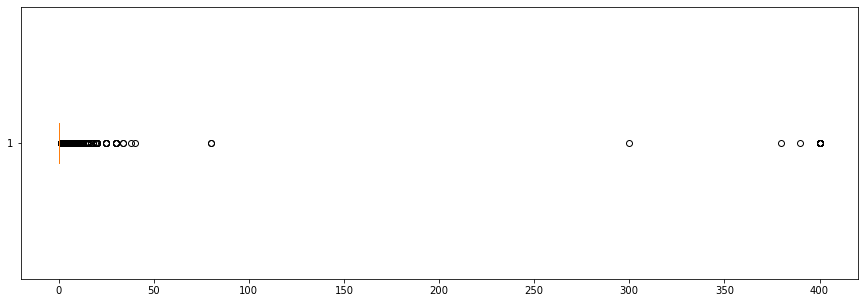

In [35]:
plt.figure(figsize= (15, 5))
plt.boxplot(google_data.Price, vert=False)
#There are some apps with high price

# Boxplot for Reviews

## Are there any apps with very high number of reviews? Do the values seem right?


{'whiskers': [<matplotlib.lines.Line2D at 0x1d51530c400>,
 'caps': [<matplotlib.lines.Line2D at 0x1d51530cb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d51530c070>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5153162b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d515316640>],
 'means': []}

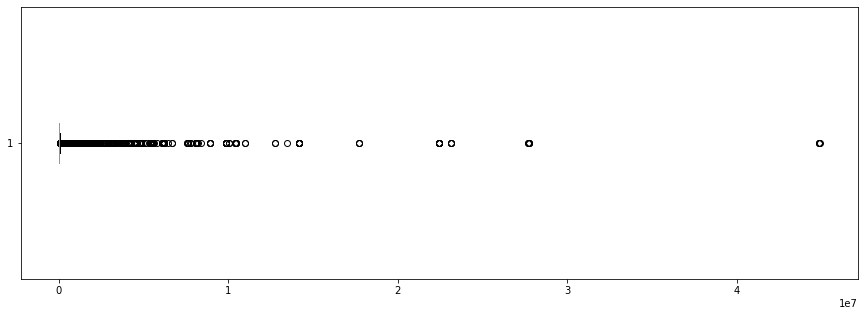

In [36]:
plt.figure(figsize= (15, 5))
plt.boxplot(google_data.Reviews, vert=False)
#very few apps have high reviews

# Histogram for Rating

## How are the ratings distributed? Is it more toward higher ratings?

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1630.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

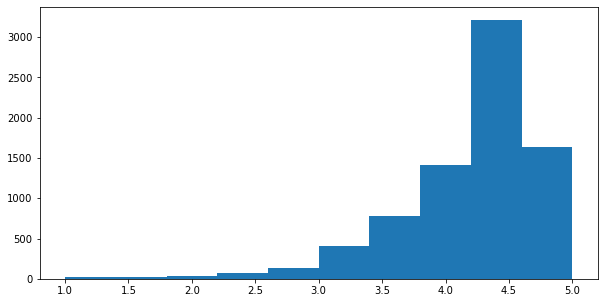

In [37]:
plt.figure(figsize= (10, 5))
plt.hist(google_data.Rating)
#frequency of rating is distributed towards high rating

# Histogram for Size

(array([3243., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

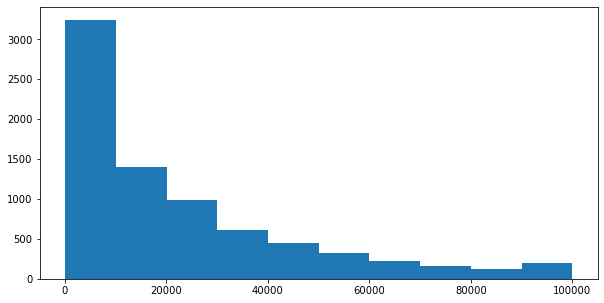

In [38]:
plt.figure(figsize= (10, 5))
plt.hist(google_data.Size)
#frequency of low size is high and gradually decreases as the size increases.

## Note down your observations for the plots made above. Which of these seem to have outliers?

# 6. Outlier treatment: 

## 6.1.Price: From the box plot, it seems like there are some apps with very high price. A price  of $200 for an application on the Play Store is very high and suspicious!

## 6.1.1.Check out the records with very high price

## 6.1.1.1.Is 200 indeed a high price?

## 6.1.2.Drop these as most seem to be junk apps

In [39]:
# display where Price is > 200
google_data[google_data['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [40]:
google_data.drop(google_data.loc[google_data['Price']>200].index, inplace=True)

In [41]:
#Recheck after dropping Price> 200 rows
google_data[google_data['Price']>200]
#none found

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 6.2 Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [42]:
# display where Reviews  > 2milion
google_data[google_data['Reviews']>2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [43]:
#Drop Reviews> 2000000
google_data.drop(google_data.loc[google_data['Reviews']>2000000].index, inplace=True)

In [44]:
#Recheck after dropping Reviews> 2000000 rows
google_data[google_data['Reviews']>2000000]
#none found

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 6.3 Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

## 6.3.1 Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

## 6.3.2 Decide a threshold as cutoff for outlier and drop records having values more than that

In [45]:
#different percentile for Installs
google_data['Installs'].quantile([0.10, 0.25, 0.50, 0.70, 0.90, 0.95, 0.99])

0.10        1000.0
0.25       10000.0
0.50      100000.0
0.70     1000000.0
0.90    10000000.0
0.95    10000000.0
0.99    50000000.0
Name: Installs, dtype: float64

In [46]:
google_data.shape

(7481, 13)

In [47]:
#Threshold decided is 90%
Threshold = google_data.Installs.quantile(0.90)

In [48]:
Threshold

10000000.0

In [49]:
# check records above the threshold (Apps having very high number of installs)
google_data[google_data.Installs > Threshold]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
225,Secure Folder,BUSINESS,3.8,14760,8600.0,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10378,BMX Boy,GAME,4.2,839206,12000.0,50000000,Free,0.0,Everyone,Racing,"September 20, 2017",1.16.33,4.1 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.0,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.0,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.0,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up


In [50]:
# New dataframe created which have records below the cut off threshold
google_data2 = google_data[google_data.Installs < Threshold]

In [51]:
#check if the rows with Installs > threshold are dropped
#none found 
google_data2[google_data2.Installs > Threshold]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

## 7.1 Make scatter plot/joinplot for Rating vs. Price

## 7.1.1 What pattern do you observe? Does rating increase with price?

In [52]:
import seaborn as sns

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


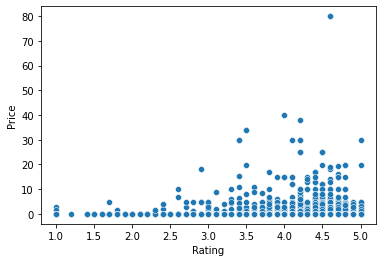

In [53]:
sns.scatterplot(google_data2.Rating, google_data2.Price)
#Rating does not seem to increase with the price

# 7.2 Make scatter plot/joinplot for Rating vs. Size

## 7.2.1 Are heavier apps rated better?

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


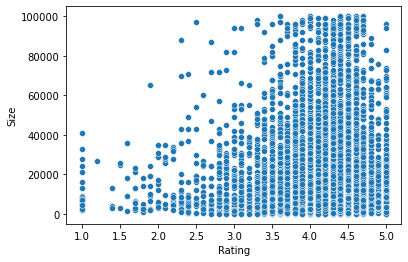

In [80]:
sns.scatterplot(google_data2.Rating, google_data2.Size)
#Heavier apps are rated better

# 7.3. Make scatter plot/joinplot for Rating vs. Reviews

## 7.3.1 Does more review mean a better rating always?

C:\Users\PurvaRaut\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


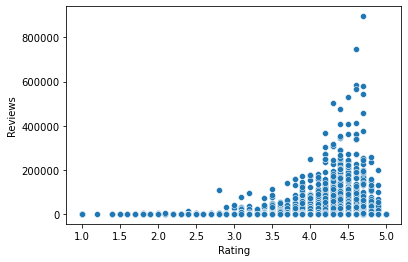

In [81]:
sns.scatterplot(google_data2.Rating, google_data2.Reviews)
# more reviews contribute to better rating in the mid range.

# 7.4.Make boxplot for Rating vs. Content Rating

## 7.4.1 Is there any difference in the ratings? Are some types liked better?

In [56]:
#Renaming col 'Content Rating' due to space
google_data2.rename(columns = {'Content Rating':'Content_Rating'}, inplace = True)

C:\Users\PURVAR~1\AppData\Local\Temp/ipykernel_22876/3901434549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_data2.rename(columns = {'Content Rating':'Content_Rating'}, inplace = True)


<AxesSubplot:xlabel='Rating', ylabel='Content_Rating'>

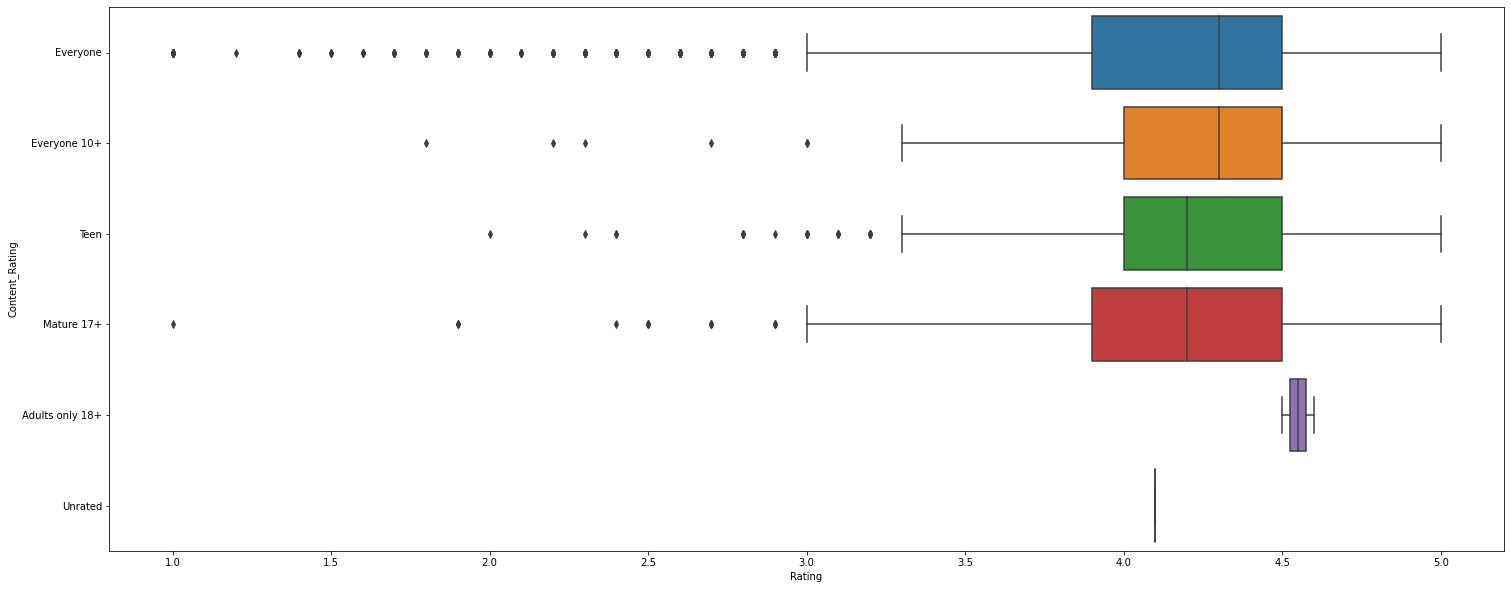

In [57]:
plt.figure(figsize = (25,10))
sns.boxplot(y = google_data2.Content_Rating, x = google_data2.Rating)
#Content rating for Adults 18+ are liked better

# 7.5 Make boxplot for Ratings vs. Category

## 7.5.1 Which genre has the best ratings?

<AxesSubplot:xlabel='Rating', ylabel='Category'>

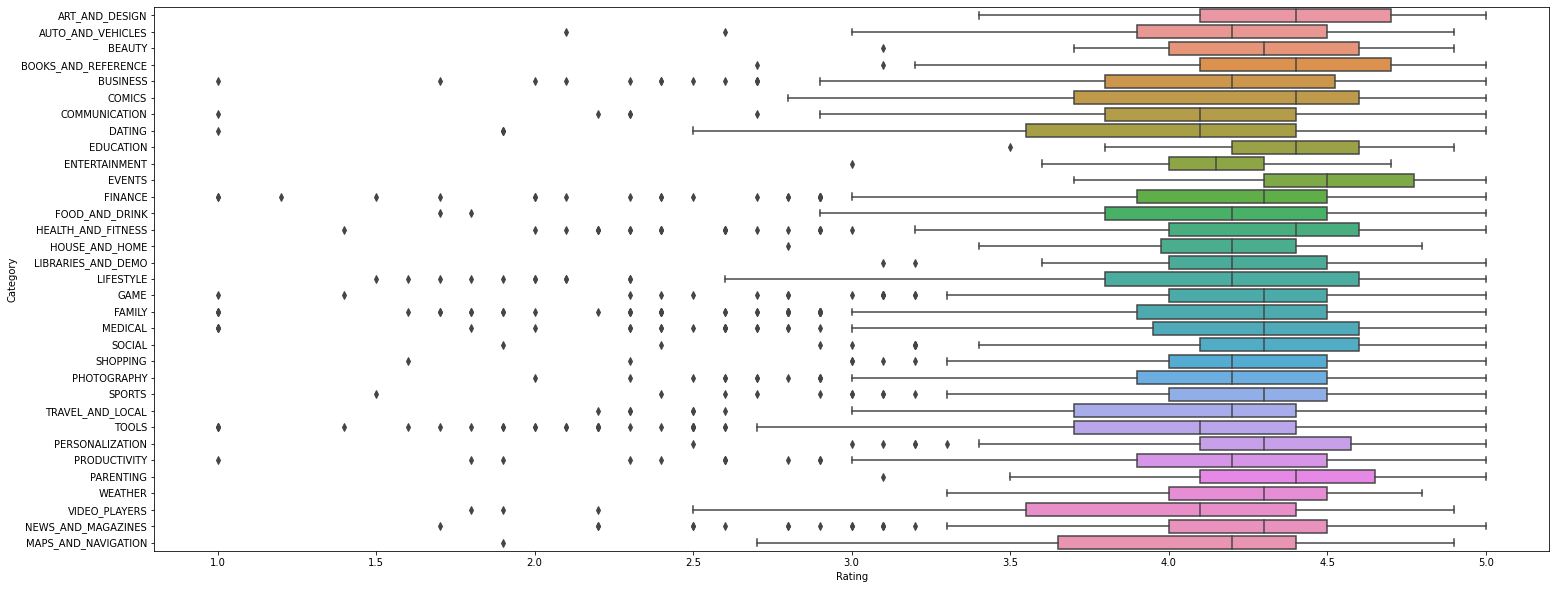

In [58]:
plt.figure(figsize = (25,10))
sns.boxplot(y = google_data2.Category, x = google_data2.Rating)
#Events genre has better ratings

# For each of the plots above, note down your observation.

# 8. Data preprocessing

## For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

In [59]:
# copy of the dataframe
inp1 = google_data2.copy()

# 8.1 Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [60]:
import numpy as np

In [61]:
# Log transformation to convert skew data into the normal distributed data
inp1['Reviews'] = np.log1p(inp1['Reviews'])

In [62]:
# Log transformation to convert skew data into the normal distributed data
inp1['Installs'] = np.log1p(inp1['Installs'])

In [63]:
#check data frame snapshot
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


# 8.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [64]:
#drop unwanted cols
inp1.drop(columns = { 'App','Last Updated','Current Ver','Android Ver'},
inplace=True)

In [65]:
#check if the above columns are dropped
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,8700.0,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,5600.0,10.819798,Free,0.0,Everyone,Art & Design


# 8.3 Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [66]:
dum_cols = ['Category','Genres','Content_Rating']
inp2 = pd.get_dummies(inp1,columns=dum_cols,drop_first=True)
inp2

,Rating,Reviews,Size,Installs,Type,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.875232,2800.0,11.512935,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.123964,5600.0,10.819798,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,3.8,7.086738,582.0,11.512935,Free,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10833,4.8,3.806662,619.0,6.908755,Free,0.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10834,4.0,2.079442,2600.0,6.216606,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,4.5,3.663562,53000.0,8.517393,Free,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
#remove 'Type' col as it is not required and also it is not numeric data
inp2.pop('Type')

0        Free
1        Free
2        Free
4        Free
5        Free
         ... 
10832    Free
10833    Free
10834    Free
10836    Free
10837    Free
Name: Type, Length: 6487, dtype: object

# 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
#70% samples training, 30% samples testing 
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

# 10.Separate the dataframes into X_train, y_train, X_test, and y_test.

In [70]:
y_train = df_train.Rating
X_train = df_train
y_test = df_test.Rating
X_test = df_test

In [82]:
#Display the shape to check 70-30 split.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4540, 149)
(1947, 149)
(4540,)
(1947,)


# 11 . Model building

## Use linear regression as the technique

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()

In [73]:
#train the model
lr.fit(X_train, y_train)

LinearRegression()

## Report the R2 on the train set

In [74]:
from sklearn.metrics import r2_score

In [75]:
y_train_pred= lr.predict(X_train)

In [76]:
# checking accuracy of the model
r2_score(y_train, y_train_pred)

1.0

In [77]:
# r2 score 1 -regression predictions fit the data

# 12. Make predictions on test set and report R2.

In [78]:
y_test_pred= lr.predict(X_test)

In [79]:
r2_score(y_test, y_test_pred)

1.0

In [ ]:
# r2 score 1 -regression predictions fit the data